<a href="https://colab.research.google.com/github/palakagl/AI-in-Finance/blob/main/StatArb_with_6_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We use 6 pairs of currencies for the portfolio
### GBPUSD pair as the asset for trading: TRADING_INSTRUMENT = 'GBPUSD=X'

In [ ]:
import pandas as pd
import numpy as np

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Fetch daily data for 10 years, for 6 major currency pairs
TRADING_INSTRUMENT = 'GBPUSD=X'
SYMBOLS = ['AUDUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'EURUSD=X', 'JPYUSD=X']
        
START_DATE = '2010-01-01'
END_DATE = '2020-12-31'

module 'yfinance' is installed


# 1(a) - Download data for 6 currency pairs (2019-2020)
### *** GBP/USD is Trading Instrument ***
Scale the JPY/USD pair by 100.0 and CNY/USD by 10 purely for visualization scaling purposes:

[*********************100%***********************]  6 of 6 completed


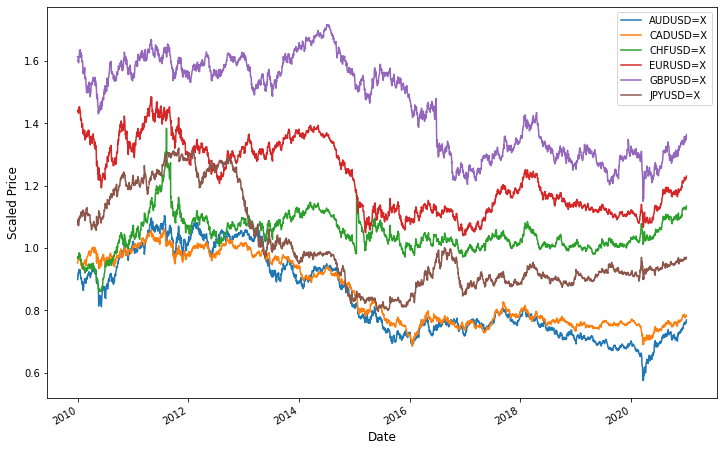

In [ ]:
df_orig=yf.download(SYMBOLS, START_DATE, END_DATE)['Close']
df=df_orig
df['JPYUSD=X']=df_orig['JPYUSD=X']*100   

df.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Price', fontsize=12)
plt.legend(prop={'size': 10})
plt.show()


#1(b) - Create ML Model for Price Prediction 

In [ ]:
df_orig.head()

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.613294,1.076195
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.611370,1.081140
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.599079,1.091882
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.602384,1.082767
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.593397,1.070778


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2010-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDUSD=X  2864 non-null   float64
 1   CADUSD=X  2864 non-null   float64
 2   CHFUSD=X  2862 non-null   float64
 3   EURUSD=X  2865 non-null   float64
 4   GBPUSD=X  2865 non-null   float64
 5   JPYUSD=X  2865 non-null   float64
dtypes: float64(6)
memory usage: 156.7 KB


### Scale Data

In [ ]:
df_scaled=df_orig.copy()
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
df_scaled

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2010-01-01,0.612582,0.708951,0.204692,0.898032,0.818590,0.534415
2010-01-04,0.639073,0.733856,0.213311,0.905675,0.815195,0.543846
2010-01-05,0.637815,0.737560,0.205050,0.892647,0.793504,0.564335
2010-01-06,0.654151,0.756491,0.216021,0.901197,0.799337,0.546949
2010-01-07,0.649043,0.751233,0.205229,0.881886,0.783477,0.524085
...,...,...,...,...,...,...
2020-12-25,0.352206,0.246767,0.501285,0.402876,0.363120,0.321875
2020-12-28,0.353172,0.248160,0.504829,0.407451,0.366716,0.324008
2020-12-29,0.348828,0.248095,0.507561,0.411572,0.347945,0.321236


## Replace Missing Values

In [ ]:
df_scaled.isna().sum()

AUDUSD=X    2
CADUSD=X    2
CHFUSD=X    4
EURUSD=X    1
GBPUSD=X    1
JPYUSD=X    1
dtype: int64

In [ ]:
is_NaN = df_orig.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_orig[row_has_NaN]

print(rows_with_NaN)

            AUDUSD=X  CADUSD=X  CHFUSD=X  EURUSD=X  GBPUSD=X  JPYUSD=X
Date                                                                  
2011-04-15       NaN       NaN       NaN  1.443210       NaN       NaN
2012-01-27  1.061582  0.997606       NaN  1.309278  1.568209  1.290989
2012-01-31  1.058604  0.997606       NaN  1.313957  1.570845  1.309586
2012-12-04       NaN       NaN       NaN       NaN  1.609787  1.217537


In [ ]:
df_orig['AUDUSD=X'] = df_orig['AUDUSD=X'].fillna((df_orig['AUDUSD=X'].mean()))
df_orig['CADUSD=X'] = df_orig['CADUSD=X'].fillna((df_orig['CADUSD=X'].mean()))
df_orig['CHFUSD=X'] = df_orig['CHFUSD=X'].fillna((df_orig['CHFUSD=X'].mean()))
df_orig['EURUSD=X'] = df_orig['EURUSD=X'].fillna((df_orig['EURUSD=X'].mean()))
df_orig['GBPUSD=X'] = df_orig['GBPUSD=X'].fillna((df_orig['GBPUSD=X'].mean()))
df_orig['JPYUSD=X'] = df_orig['JPYUSD=X'].fillna((df_orig['JPYUSD=X'].mean()))
df_orig.isnull().sum()

AUDUSD=X    0
CADUSD=X    0
CHFUSD=X    0
EURUSD=X    0
GBPUSD=X    0
JPYUSD=X    0
dtype: int64

##Split Data in X & Y

In [ ]:
df_process = df_orig.copy()
y = df_orig['GBPUSD=X']
train_data = df_process.drop(['GBPUSD=X'], axis=1)
train_data

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,JPYUSD=X
Date,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.076195
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.081140
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.091882
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.082767
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.070778
...,...,...,...,...,...
2020-12-25,0.760680,0.778319,1.122460,1.218472,0.964757
2020-12-28,0.761191,0.778840,1.124316,1.220510,0.965876
2020-12-29,0.758892,0.778816,1.125746,1.222345,0.964422


In [ ]:
y

Date
2010-01-01    1.613294
2010-01-04    1.611370
2010-01-05    1.599079
2010-01-06    1.602384
2010-01-07    1.593397
                ...   
2020-12-25    1.355201
2020-12-28    1.357239
2020-12-29    1.346602
2020-12-30    1.349990
2020-12-31    1.363066
Name: GBPUSD=X, Length: 2866, dtype: float64

#Model Building

In [ ]:
# randomly split the data
train_X, val_X, train_y, val_y = train_test_split(train_data, y,test_size=0.20,random_state=0)

# shape of train and test splits
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((2292, 5), (574, 5), (2292,), (574,))

In [ ]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_X, train_y)

LinearRegression()

##Make Prediction on Validation Data

In [ ]:
# predict the target on train and val data 
predict_train = model_LR.predict(train_X)
predict_val  = model_LR.predict(val_X)

# Root Mean Squared Error on train and val data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on Val data: ',  mean_squared_error(val_y, predict_val)**(0.5))

RMSE on train data:  0.0687800916041727
RMSE on Val data:  0.06839052563407447


##Test Data Predictions

### Download 2021 Data for 6 Currency Pairs 
We will remove the trading instrument closing prices from this dataframe and will use it to generate trading signal later

In [ ]:
START_DATE = '2021-01-01'
END_DATE = '2021-12-31'
df_test_orig=yf.download(SYMBOLS, START_DATE, END_DATE)['Close']
df_test_orig

[*********************100%***********************]  6 of 6 completed


,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706
...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713


In [ ]:
#Checking missing values
df_test_orig.isnull().sum()

AUDUSD=X    0
CADUSD=X    0
CHFUSD=X    0
EURUSD=X    0
GBPUSD=X    0
JPYUSD=X    0
dtype: int64

In [ ]:
df_test_predict = df_test_orig.copy()
test_data = df_test_predict.drop(['GBPUSD=X'], axis=1)
test_data

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,JPYUSD=X
Date,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,0.009687
2021-01-04,0.771230,0.786034,1.132375,1.225070,0.009686
2021-01-05,0.767100,0.782411,1.134765,1.225160,0.009697
2021-01-06,0.776600,0.788973,1.138719,1.230027,0.009739
2021-01-07,0.781700,0.789553,1.138861,1.234111,0.009706
...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,0.008746
2021-12-28,0.723700,0.782044,1.090322,1.133003,0.008711
2021-12-29,0.723400,0.780457,1.090631,1.131478,0.008713


### Predict Trading Instrument Price for 2021

In [ ]:
predict_test  = model_LR.predict(test_data)

test_y = df_test_orig['GBPUSD=X']

# Root Mean Squared Error on train and test data
print('RMSE on Test data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on Test data:  0.5413435105423067


#1(C) Trading Instrument (GBP/USD) - Trading Strategy for 2021
Implement a trading strategy similar to the StatArb for the year 2021. The trading signal is generated in the following way: On each day, if your ML predicted price is higher than the ACTUAL closing price (by a certain threshold), it is a buy signal; if the predicted price is lower than the actual closing price by a certain threshold, you should short.

In [ ]:
# Constants/variables that are used to compute simple moving average and price deviation from simple moving average
SMA_NUM_PERIODS = 20  # look back period
price_history = {}  # history of prices

PRICE_DEV_NUM_PRICES = 200 # look back period of ClosePrice deviations from SMA
price_deviation_from_sma = {}  # history of ClosePrice deviations from SMA

# We will use this to iterate over all the days of data we have
num_days = len(df_test_orig[TRADING_INSTRUMENT].index)

correlation_history = {} # history of correlations per currency pair
change_projected_actual_history = {} # history of differences between Projected ClosePrice deviation and actual ClosePrice deviation per currency pair

final_change_projected_history = [] # history of differences between final Projected ClosePrice deviation for TRADING_INSTRUMENT and actual ClosePrice deviation

# Variables for Trading Strategy trade, position & pnl management:
orders = []  # Container for tracking buy/sell order, +1 for buy order, -1 for sell order, 0 for no-action
positions = []  # Container for tracking positions, +ve for long positions, -ve for short positions, 0 for flat/no position
pnls = []  # Container for tracking total_pnls, this is the sum of closed_pnl i.e. pnls already locked in and open_pnl i.e. pnls for open-position marked to market price

last_buy_price = 0  # Price at which last buy trade was made, used to prevent over-trading at/around the same price
last_sell_price = 0  # Price at which last sell trade was made, used to prevent over-trading at/around the same price
position = 0  # Current position of the trading strategy
buy_sum_price_qty = 0  # Summation of products of buy_trade_price and buy_trade_qty for every buy Trade made since last time being flat
buy_sum_qty = 0  # Summation of buy_trade_qty for every buy Trade made since last time being flat
sell_sum_price_qty = 0  # Summation of products of sell_trade_price and sell_trade_qty for every sell Trade made since last time being flat
sell_sum_qty = 0  # Summation of sell_trade_qty for every sell Trade made since last time being flat
open_pnl = 0  # Open/Unrealized PnL marked to market
closed_pnl = 0  # Closed/Realized PnL so far

# Constants that define strategy behavior/thresholds
StatArb_VALUE_FOR_BUY_ENTRY = 0.01  # StatArb trading signal value aboe which to enter buy-orders/long-position
StatArb_VALUE_FOR_SELL_ENTRY = -0.01  # StatArb trading signal value below which to enter sell-orders/short-position
MIN_PRICE_MOVE_FROM_LAST_TRADE = 0.01 # Minimum price change since last trade before considering trading again, this is to prevent over-trading at/around same prices
NUM_SHARES_PER_TRADE = 1000000  # Number of currency to buy/sell on every trade
MIN_PROFIT_TO_CLOSE = 10  # Minimum Open/Unrealized profit at which to close positions and lock profits


In [ ]:
final_change_projected = predict_test - test_y
final_change_projected

Date
2021-01-01    0.580045
2021-01-04    0.556834
2021-01-05    0.563454
2021-01-06    0.570067
2021-01-07    0.573003
                ...   
2021-12-27    0.539073
2021-12-28    0.538208
2021-12-29    0.536967
2021-12-30    0.535325
2021-12-31    0.537582
Name: GBPUSD=X, Length: 261, dtype: float64

In [ ]:
import statistics as stats

for i in range(0, num_days):
    close_prices = {}
    # Build ClosePrice series, compute SMA for each symbol and price-deviation from SMA for each symbol
    for symbol in SYMBOLS:
        close_prices[symbol] = df[symbol].iloc[i]
        if not symbol in price_history.keys():
            price_history[symbol] = []
            price_deviation_from_sma[symbol] = []
        price_history[symbol].append(close_prices[symbol])
        if len(price_history[symbol]) > SMA_NUM_PERIODS:  # we track at most SMA_NUM_PERIODS number of prices
            del (price_history[symbol][0])
    close_price = close_prices[TRADING_INSTRUMENT]
#####################################################################################################################    
#################################################CHANGE THE CODE ABOVE ##############################################
#####################################################################################################################
    # This section checks trading signal against trading parameters/thresholds and positions, to trade.
    #
    # We will perform a sell trade at close_prices if the following conditions are met:
    # 1. The StatArb trading signal value is below Sell-Entry threshold and the difference between last trade-price and current-price is different enough.
    # 2. We are long( +ve position ) and current position is profitable enough to lock profit.
    if ((final_change_projected[i] < StatArb_VALUE_FOR_SELL_ENTRY and abs(close_price - last_sell_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb above sell entry threshold, we should sell
      or (position > 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # long from -ve StatArb and StatArb has gone positive or position is profitable, sell to close position
        orders.append(-1)  # mark the sell trade
        last_sell_price = close_price
        position -= NUM_SHARES_PER_TRADE  # reduce position by the size of this trade
        sell_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update vwap sell-price
        sell_sum_qty += NUM_SHARES_PER_TRADE
        print("Sell ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
        print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))
    # We will perform a buy trade at close_prices if the following conditions are met:
    # 1. The StatArb trading signal value is above Buy-Entry threshold and the difference between last trade-price and current-price is different enough.
    # 2. We are short( -ve position ) and current position is profitable enough to lock profit.
    elif ((final_change_projected[i] > StatArb_VALUE_FOR_BUY_ENTRY and abs(close_price - last_buy_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb below buy entry threshold, we should buy
        or (position < 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # short from +ve StatArb and StatArb has gone negative or position is profitable, buy to close position
        orders.append(+1)  # mark the buy trade
        last_buy_price = close_price
        position += NUM_SHARES_PER_TRADE  # increase position by the size of this trade
        buy_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update the vwap buy-price
        buy_sum_qty += NUM_SHARES_PER_TRADE
        print("Buy ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
        print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))
    else:
    # No trade since none of the conditions were met to buy or sell
        orders.append(0)

    positions.append(position)

    # This section updates Open/Unrealized & Closed/Realized positions
    open_pnl = 0
    if position > 0:
        if sell_sum_qty > 0:  # long position and some sell trades have been made against it, close that amount based on how much was sold against this long position
            open_pnl = abs(sell_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
        # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
        open_pnl += abs(sell_sum_qty - position) * (close_price - buy_sum_price_qty / buy_sum_qty)
    elif position < 0:
        if buy_sum_qty > 0:  # short position and some buy trades have been made against it, close that amount based on how much was bought against this short position
            open_pnl = abs(buy_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
        # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
        open_pnl += abs(buy_sum_qty - position) * (sell_sum_price_qty / sell_sum_qty - close_price)
    else:
        # flat, so update closed_pnl and reset tracking variables for positions & pnls
        closed_pnl += (sell_sum_price_qty - buy_sum_price_qty)
        buy_sum_price_qty = 0
        buy_sum_qty = 0
        sell_sum_price_qty = 0
        sell_sum_qty = 0
        last_buy_price = 0
        last_sell_price = 0

    pnls.append(closed_pnl + open_pnl)

Buy  1000000  @  1.6132936477661133 Position:  1000000
OpenPnL:  0  ClosedPnL:  0  TotalPnL:  0
Buy  1000000  @  1.599078893661499 Position:  2000000
OpenPnL:  -1923.7995147705078  ClosedPnL:  0  TotalPnL:  -1923.7995147705078
Buy  1000000  @  1.6112918853759766 Position:  3000000
OpenPnL:  -7552.385330200195  ClosedPnL:  0  TotalPnL:  -7552.385330200195
Sell  1000000  @  1.615169644355774 Position:  2000000
OpenPnL:  10211.229324340598  ClosedPnL:  0  TotalPnL:  10211.229324340598
Sell  1000000  @  1.628611445426941 Position:  1000000
OpenPnL:  14563.004175821792  ClosedPnL:  0  TotalPnL:  14563.004175821792
Sell  1000000  @  1.6333998441696167 Position:  0
OpenPnL:  48728.108406066676  ClosedPnL:  0  TotalPnL:  48728.108406066676
Buy  1000000  @  1.6269950866699219 Position:  1000000
OpenPnL:  0  ClosedPnL:  53516.507148742676  TotalPnL:  53516.507148742676
Sell  1000000  @  1.6356706619262695 Position:  0
OpenPnL:  8301.258087158203  ClosedPnL:  53516.507148742676  TotalPnL:  61817.

In [ ]:
ser = pd.Series(predict_test,name="gbp_usd_predicted_price")
df_test_pred = ser.to_frame()
df_test_pred

,gbp_usd_predicted_price
0,1.947346
1,1.925254
2,1.920614
3,1.933022
4,1.935531
...,...
256,1.879504
257,1.882475
258,1.880295
259,1.885204


In [ ]:
df_final=df_test_orig.copy()
df_final['gbp_usd_predicted_price'] = df_test_pred['gbp_usd_predicted_price'].values
df_final

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,gbp_usd_predicted_price
Date,,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687,1.947346
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686,1.925254
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697,1.920614
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739,1.933022
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706,1.935531
...,...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746,1.879504
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711,1.882475
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713,1.880295


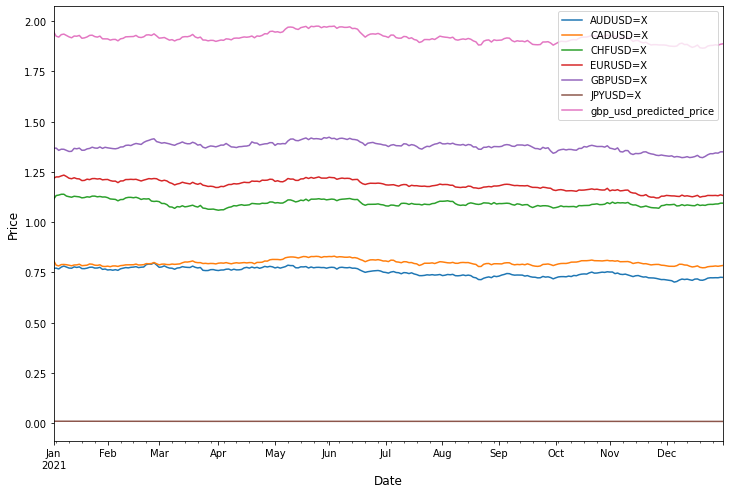

In [ ]:
df_final.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(prop={'size': 10})
plt.show()

##Generate Trading Signals

In [ ]:
pd.Series(orders)

0      1
1      0
2      1
3      0
4      0
      ..
256    0
257    0
258    0
259    0
260    0
Length: 261, dtype: int64

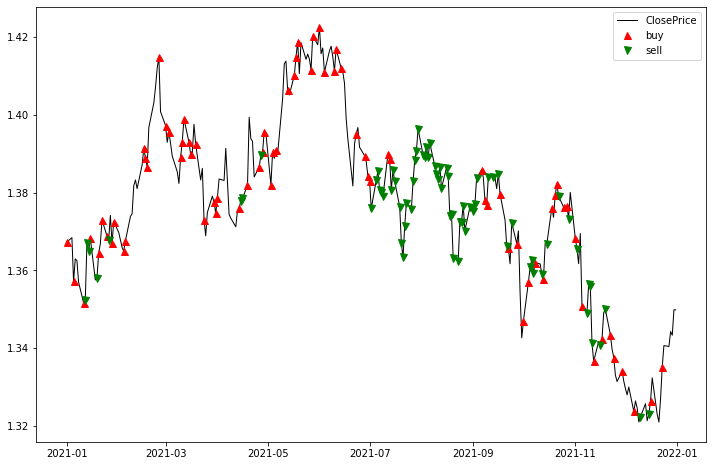

In [ ]:
change_projected_actual_data = pd.DataFrame(data={}, index=df_test_predict[TRADING_INSTRUMENT].index)
change_projected_actual_data = change_projected_actual_data.assign(ClosePrice=pd.Series(df_test_predict[TRADING_INSTRUMENT], index=df_test_predict[TRADING_INSTRUMENT].index))
change_projected_actual_data = change_projected_actual_data.assign(FinalStatArbTradingSignal=pd.Series(final_change_projected, index=df_test_predict[TRADING_INSTRUMENT].index))
change_projected_actual_data = change_projected_actual_data.assign(Trades=pd.Series(orders, index=df_test_predict[TRADING_INSTRUMENT].index))
change_projected_actual_data = change_projected_actual_data.assign(Position=pd.Series(positions, index=df_test_predict[TRADING_INSTRUMENT].index))
change_projected_actual_data = change_projected_actual_data.assign(Pnl=pd.Series(pnls, index=df_test_predict[TRADING_INSTRUMENT].index))

plt.plot(change_projected_actual_data.index, change_projected_actual_data.ClosePrice, color='k', lw=1., label='ClosePrice')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == 1].index, change_projected_actual_data.ClosePrice[change_projected_actual_data.Trades == 1], color='r', lw=0, marker='^', markersize=7, label='buy')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == -1].index, change_projected_actual_data.ClosePrice[change_projected_actual_data.Trades == -1], color='g', lw=0, marker='v', markersize=7, label='sell')
plt.legend()
plt.show()


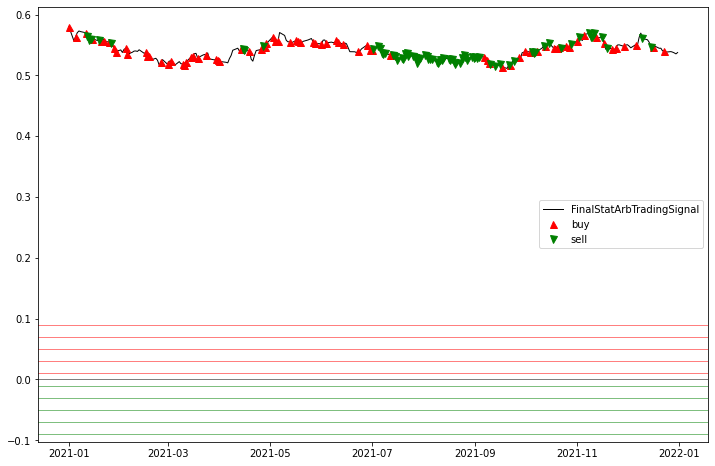

In [ ]:
plt.plot(change_projected_actual_data.index, change_projected_actual_data.FinalStatArbTradingSignal, color='k', lw=1., label='FinalStatArbTradingSignal')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == 1].index, change_projected_actual_data.FinalStatArbTradingSignal[change_projected_actual_data.Trades == 1], color='r', lw=0, marker='^', markersize=7, label='buy')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == -1].index, change_projected_actual_data.FinalStatArbTradingSignal[change_projected_actual_data.Trades == -1], color='g', lw=0, marker='v', markersize=7, label='sell')
plt.axhline(y=0, lw=0.5, color='k')
for i in np.arange(StatArb_VALUE_FOR_BUY_ENTRY, StatArb_VALUE_FOR_BUY_ENTRY * 10, StatArb_VALUE_FOR_BUY_ENTRY * 2):
    plt.axhline(y=i, lw=0.5, color='r')
for i in np.arange(StatArb_VALUE_FOR_SELL_ENTRY, StatArb_VALUE_FOR_SELL_ENTRY * 10, StatArb_VALUE_FOR_SELL_ENTRY * 2):
    plt.axhline(y=i, lw=0.5, color='g')
plt.legend()
plt.show()

### Visualizing the positions and PnLs:

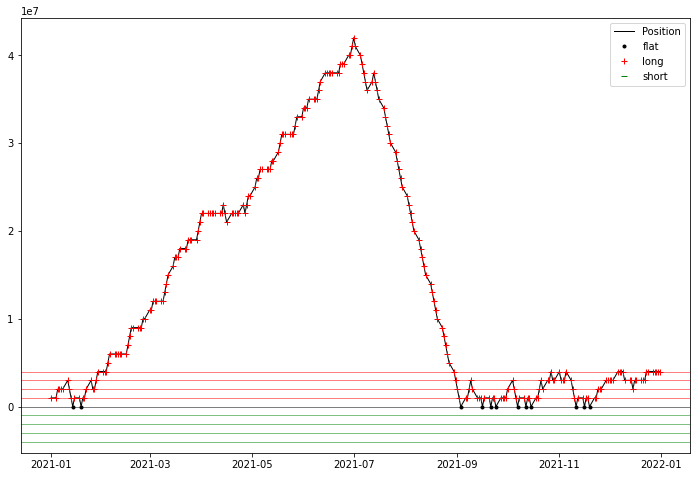

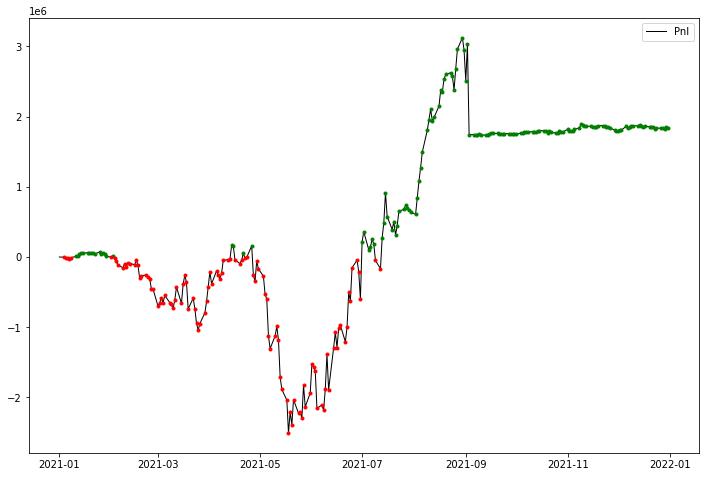

The final PnL is:  1837496.9959259033


In [ ]:
plt.plot(change_projected_actual_data.index, change_projected_actual_data.Position, color='k', lw=1., label='Position')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position == 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position == 0], color='k', lw=0, marker='.', label='flat')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position > 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position > 0], color='r', lw=0, marker='+', label='long')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position < 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position < 0], color='g', lw=0, marker='_', label='short')
plt.axhline(y=0, lw=0.5, color='k')
for i in range(NUM_SHARES_PER_TRADE, NUM_SHARES_PER_TRADE * 5, NUM_SHARES_PER_TRADE):
    plt.axhline(y=i, lw=0.5, color='r')
for i in range(-NUM_SHARES_PER_TRADE, -NUM_SHARES_PER_TRADE * 5, -NUM_SHARES_PER_TRADE):
    plt.axhline(y=i, lw=0.5, color='g')
plt.legend()
plt.show()
plt.plot(change_projected_actual_data.index, change_projected_actual_data.Pnl, color='k', lw=1., label='Pnl')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Pnl > 0].index, change_projected_actual_data.Pnl[change_projected_actual_data.Pnl > 0], color='g', lw=0, marker='.')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Pnl < 0].index, change_projected_actual_data.Pnl[change_projected_actual_data.Pnl < 0], color='r', lw=0, marker='.')
plt.legend()
plt.show()

print('The final PnL is: ', change_projected_actual_data.Pnl[-1] )
change_projected_actual_data.to_csv("statistical_arbitrage.csv", sep=",")

#1(d) LSTM Implementation
Extend the implementation to the case where you can also use historical prices (eg., like the LSTM program you used in Assignment 2.  You can use the CURRENT closing price as well for all the pairs except the trading instrument you have chosen.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Window size (n_period) is the input
n_period = 60
train_data_len = df_orig.shape[0]

# Make training dataset
train_data = df_orig[0:train_data_len]
x_train = []
y_train = train_data[TRADING_INSTRUMENT][n_period-1:-1]

for symbol in SYMBOLS:

  if symbol != TRADING_INSTRUMENT:  
    for i in range(n_period+1 , len(train_data)+1):
        x_train.append(train_data[symbol][i-n_period:i].values)
  elif symbol == TRADING_INSTRUMENT:
    for i in range(n_period, len(train_data)):
        x_train.append(train_data[symbol][i-n_period:i].values)

In [ ]:
# Convert x_train and y_train to Numpy arrays
x_train= np.array(x_train)
y_train= np.array(y_train)

# Reshape x_train for LSTM model training
x_train = np.reshape(x_train, (int(x_train.shape[0]/6), 6, int(x_train.shape[1])), order='F')

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1)) 

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, validation_split= 0.2, batch_size=1, epochs=8)

Epoch 1/8
2244/2244 [==============================] - 26s 9ms/step - loss: 0.0118 - val_loss: 7.9286e-04
Epoch 2/8
2244/2244 [==============================] - 21s 9ms/step - loss: 0.0041 - val_loss: 0.0078
Epoch 3/8
2244/2244 [==============================] - 20s 9ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 4/8
2244/2244 [==============================] - 17s 8ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 5/8
2244/2244 [==============================] - 15s 7ms/step - loss: 0.0019 - val_loss: 8.3874e-04
Epoch 6/8
2244/2244 [==============================] - 15s 6ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 7/8
2244/2244 [==============================] - 14s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/8
2244/2244 [==============================] - 15s 7ms/step - loss: 0.0011 - val_loss: 5.0858e-04


In [ ]:
test_data[TRADING_INSTRUMENT][n_period:]

Date
2021-03-26    1.374911
2021-03-29    1.379101
2021-03-30    1.377505
2021-03-31    1.374665
2021-04-01    1.378626
                ...   
2021-12-27    1.340430
2021-12-28    1.344267
2021-12-29    1.343328
2021-12-30    1.349879
2021-12-31    1.349837
Name: GBPUSD=X, Length: 201, dtype: float64

In [ ]:
# Window size (n_period) is the input
n_period = 60
test_data_len = df_test_predict.shape[0]

# Make training dataset
test_data = df_test_predict[0:test_data_len]
x_test = []
y_test = test_data[TRADING_INSTRUMENT][n_period:]

for symbol in SYMBOLS:

  if symbol != TRADING_INSTRUMENT:  
    for i in range(n_period+1 , len(test_data)+1):
        x_test.append(test_data[symbol][i-n_period:i].values)
  elif symbol == TRADING_INSTRUMENT:
    for i in range(n_period, len(test_data)):
        x_test.append(test_data[symbol][i-n_period:i].values)


In [ ]:
pd.Series(x_test)

0       [0.7712300419807434, 0.7670999765396118, 0.776...
1       [0.7670999765396118, 0.7766000628471375, 0.781...
2       [0.7766000628471375, 0.781700074672699, 0.7768...
3       [0.781700074672699, 0.7768999934196472, 0.7716...
4       [0.7768999934196472, 0.7716525793075562, 0.770...
                              ...                        
1201    [0.009011606685817242, 0.008969655260443687, 0...
1202    [0.008969655260443687, 0.008975612930953503, 0...
1203    [0.008975612930953503, 0.008955597877502441, 0...
1204    [0.008955597877502441, 0.00890709925442934, 0....
1205    [0.00890709925442934, 0.0088192755356431, 0.00...
Length: 1206, dtype: object

In [ ]:
# Convert x_train and y_train to Numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape x_train for LSTM model training
x_test = np.reshape(x_test, (int(x_test.shape[0]/6), 6, int(x_test.shape[1])), order = 'F')

In [ ]:
y_pred = model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred)
print('RMSE :',np.round(rmse,5))

RMSE : 0.01828


In [ ]:
df_test_predict

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706
...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713


In [ ]:
final_change_projected = y_pred.reshape(-1) - y_test

In [ ]:
final_change_projected.shape

(201,)

In [ ]:
# Constants/variables that are used to compute simple moving average and price deviation from simple moving average
SMA_NUM_PERIODS = 20  # look back period
price_history = {}  # history of prices

PRICE_DEV_NUM_PRICES = 200 # look back period of ClosePrice deviations from SMA
price_deviation_from_sma = {}  # history of ClosePrice deviations from SMA

# We will use this to iterate over all the days of data we have
num_days = len(final_change_projected)

correlation_history = {} # history of correlations per currency pair
change_projected_actual_history = {} # history of differences between Projected ClosePrice deviation and actual ClosePrice deviation per currency pair

final_change_projected_history = [] # history of differences between final Projected ClosePrice deviation for TRADING_INSTRUMENT and actual ClosePrice deviation

# Variables for Trading Strategy trade, position & pnl management:
orders = []  # Container for tracking buy/sell order, +1 for buy order, -1 for sell order, 0 for no-action
positions = []  # Container for tracking positions, +ve for long positions, -ve for short positions, 0 for flat/no position
pnls = []  # Container for tracking total_pnls, this is the sum of closed_pnl i.e. pnls already locked in and open_pnl i.e. pnls for open-position marked to market price

last_buy_price = 0  # Price at which last buy trade was made, used to prevent over-trading at/around the same price
last_sell_price = 0  # Price at which last sell trade was made, used to prevent over-trading at/around the same price
position = 0  # Current position of the trading strategy
buy_sum_price_qty = 0  # Summation of products of buy_trade_price and buy_trade_qty for every buy Trade made since last time being flat
buy_sum_qty = 0  # Summation of buy_trade_qty for every buy Trade made since last time being flat
sell_sum_price_qty = 0  # Summation of products of sell_trade_price and sell_trade_qty for every sell Trade made since last time being flat
sell_sum_qty = 0  # Summation of sell_trade_qty for every sell Trade made since last time being flat
open_pnl = 0  # Open/Unrealized PnL marked to market
closed_pnl = 0  # Closed/Realized PnL so far

# Constants that define strategy behavior/thresholds
StatArb_VALUE_FOR_BUY_ENTRY = 0.01  # StatArb trading signal value aboe which to enter buy-orders/long-position
StatArb_VALUE_FOR_SELL_ENTRY = -0.01  # StatArb trading signal value below which to enter sell-orders/short-position
MIN_PRICE_MOVE_FROM_LAST_TRADE = 0.01 # Minimum price change since last trade before considering trading again, this is to prevent over-trading at/around same prices
NUM_SHARES_PER_TRADE = 1000000  # Number of currency to buy/sell on every trade
MIN_PROFIT_TO_CLOSE = 10  # Minimum Open/Unrealized profit at which to close positions and lock profits


In [ ]:
for i in range(0, num_days):
    close_prices = {}
    # Build ClosePrice series, compute SMA for each symbol and price-deviation from SMA for each symbol
    for symbol in SYMBOLS:
        close_prices[symbol] = df_test_predict[symbol].iloc[i]
        if not symbol in price_history.keys():
            price_history[symbol] = []
            price_deviation_from_sma[symbol] = []
        price_history[symbol].append(close_prices[symbol])
        if len(price_history[symbol]) > SMA_NUM_PERIODS:  # we track at most SMA_NUM_PERIODS number of prices
            del (price_history[symbol][0])
    close_price = close_prices[TRADING_INSTRUMENT]

    if ((final_change_projected[i] < StatArb_VALUE_FOR_SELL_ENTRY and abs(close_price - last_sell_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb above sell entry threshold, we should sell
      or (position > 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # long from -ve StatArb and StatArb has gone positive or position is profitable, sell to close position
        orders.append(-1)  # mark the sell trade
        last_sell_price = close_price
        position -= NUM_SHARES_PER_TRADE  # reduce position by the size of this trade
        sell_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update vwap sell-price
        sell_sum_qty += NUM_SHARES_PER_TRADE
        print("Sell ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
        print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))
    # We will perform a buy trade at close_prices if the following conditions are met:
    # 1. The StatArb trading signal value is above Buy-Entry threshold and the difference between last trade-price and current-price is different enough.
    # 2. We are short( -ve position ) and current position is profitable enough to lock profit.
    elif ((final_change_projected[i] > StatArb_VALUE_FOR_BUY_ENTRY and abs(close_price - last_buy_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb below buy entry threshold, we should buy
        or (position < 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # short from +ve StatArb and StatArb has gone negative or position is profitable, buy to close position
        orders.append(+1)  # mark the buy trade
        last_buy_price = close_price
        position += NUM_SHARES_PER_TRADE  # increase position by the size of this trade
        buy_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update the vwap buy-price
        buy_sum_qty += NUM_SHARES_PER_TRADE
        print("Buy ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
        print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))
    else:
    # No trade since none of the conditions were met to buy or sell
        orders.append(0)

    positions.append(position)

    # This section updates Open/Unrealized & Closed/Realized positions
    open_pnl = 0
    if position > 0:
        if sell_sum_qty > 0:  # long position and some sell trades have been made against it, close that amount based on how much was sold against this long position
            open_pnl = abs(sell_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
        # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
        open_pnl += abs(sell_sum_qty - position) * (close_price - buy_sum_price_qty / buy_sum_qty)
    elif position < 0:
        if buy_sum_qty > 0:  # short position and some buy trades have been made against it, close that amount based on how much was bought against this short position
            open_pnl = abs(buy_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
        # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
        open_pnl += abs(buy_sum_qty - position) * (sell_sum_price_qty / sell_sum_qty - close_price)
    else:
        # flat, so update closed_pnl and reset tracking variables for positions & pnls
        closed_pnl += (sell_sum_price_qty - buy_sum_price_qty)
        buy_sum_price_qty = 0
        buy_sum_qty = 0
        sell_sum_price_qty = 0
        sell_sum_qty = 0
        last_buy_price = 0
        last_sell_price = 0

    pnls.append(closed_pnl + open_pnl)

Buy  1000000  @  1.3673007488250732 Position:  1000000
OpenPnL:  0  ClosedPnL:  0  TotalPnL:  0
Sell  1000000  @  1.3571596145629883 Position:  0
OpenPnL:  1118.8983917236328  ClosedPnL:  0  TotalPnL:  1118.8983917236328
Buy  1000000  @  1.3629549741744995 Position:  1000000
OpenPnL:  0  ClosedPnL:  -10141.134262084961  TotalPnL:  -10141.134262084961
Buy  1000000  @  1.3516253232955933 Position:  2000000
OpenPnL:  -5992.412567138672  ClosedPnL:  -10141.134262084961  TotalPnL:  -16133.546829223633
Buy  1000000  @  1.3670539855957031 Position:  3000000
OpenPnL:  -9757.518768310547  ClosedPnL:  -10141.134262084961  TotalPnL:  -19898.653030395508
Sell  1000000  @  1.364926815032959 Position:  2000000
OpenPnL:  19527.6737213137  ClosedPnL:  -10141.134262084961  TotalPnL:  9386.539459228738
Sell  1000000  @  1.3683634996414185 Position:  1000000
OpenPnL:  8764.108022054184  ClosedPnL:  -10141.134262084961  TotalPnL:  -1377.0262400307765
Sell  1000000  @  1.357533574104309 Position:  0
OpenPn

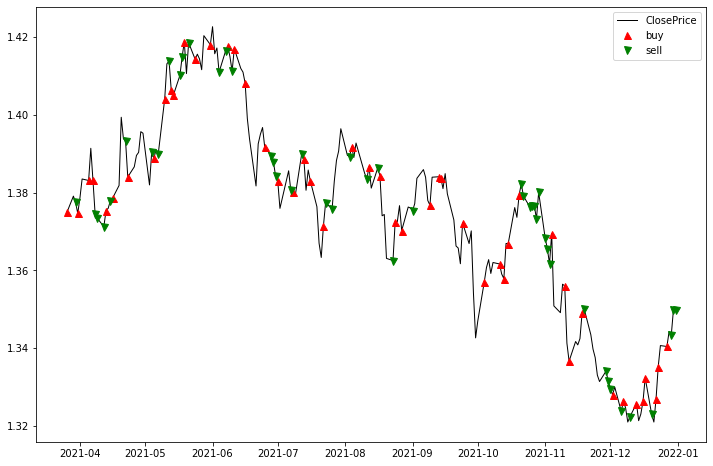

In [ ]:
change_projected_actual_data = pd.DataFrame(data={}, index=df_test_predict[TRADING_INSTRUMENT].index)
change_projected_actual_data = change_projected_actual_data.assign(ClosePrice=pd.Series(df_test_predict[TRADING_INSTRUMENT], index=df_test_predict[TRADING_INSTRUMENT].index[-201:]))
change_projected_actual_data = change_projected_actual_data.assign(FinalStatArbTradingSignal=pd.Series(final_change_projected, index=df_test_predict[TRADING_INSTRUMENT].index[-201:]))
change_projected_actual_data = change_projected_actual_data.assign(Trades=pd.Series(orders, index=df_test_predict[TRADING_INSTRUMENT].index[-201:]))
change_projected_actual_data = change_projected_actual_data.assign(Position=pd.Series(positions, index=df_test_predict[TRADING_INSTRUMENT].index[-201:]))
change_projected_actual_data = change_projected_actual_data.assign(Pnl=pd.Series(pnls, index=df_test_predict[TRADING_INSTRUMENT].index[-201:]))

plt.plot(change_projected_actual_data.index, change_projected_actual_data.ClosePrice, color='k', lw=1., label='ClosePrice')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == 1].index, change_projected_actual_data.ClosePrice[change_projected_actual_data.Trades == 1], color='r', lw=0, marker='^', markersize=7, label='buy')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == -1].index, change_projected_actual_data.ClosePrice[change_projected_actual_data.Trades == -1], color='g', lw=0, marker='v', markersize=7, label='sell')
plt.legend()
plt.show()

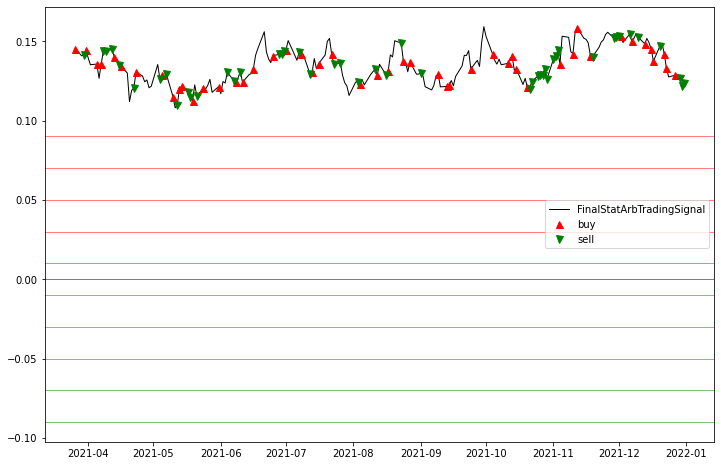

In [ ]:
plt.plot(change_projected_actual_data.index, change_projected_actual_data.FinalStatArbTradingSignal, color='k', lw=1., label='FinalStatArbTradingSignal')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == 1].index, change_projected_actual_data.FinalStatArbTradingSignal[change_projected_actual_data.Trades == 1], color='r', lw=0, marker='^', markersize=7, label='buy')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Trades == -1].index, change_projected_actual_data.FinalStatArbTradingSignal[change_projected_actual_data.Trades == -1], color='g', lw=0, marker='v', markersize=7, label='sell')
plt.axhline(y=0, lw=0.5, color='k')
for i in np.arange(StatArb_VALUE_FOR_BUY_ENTRY, StatArb_VALUE_FOR_BUY_ENTRY * 10, StatArb_VALUE_FOR_BUY_ENTRY * 2):
    plt.axhline(y=i, lw=0.5, color='r')
for i in np.arange(StatArb_VALUE_FOR_SELL_ENTRY, StatArb_VALUE_FOR_SELL_ENTRY * 10, StatArb_VALUE_FOR_SELL_ENTRY * 2):
    plt.axhline(y=i, lw=0.5, color='g')
plt.legend()
plt.show()

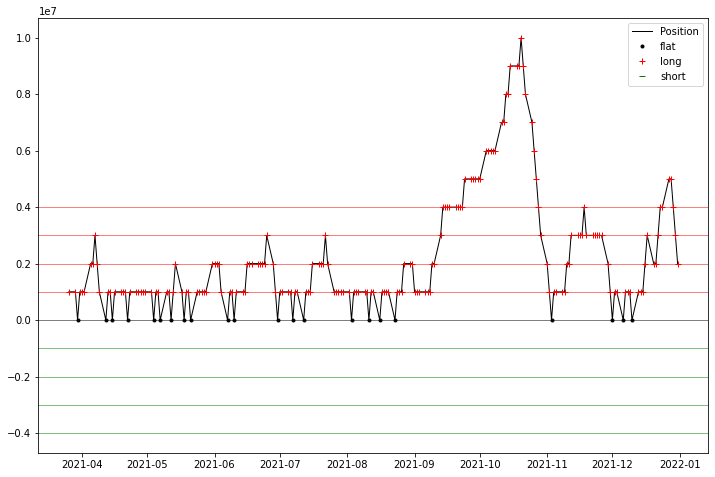

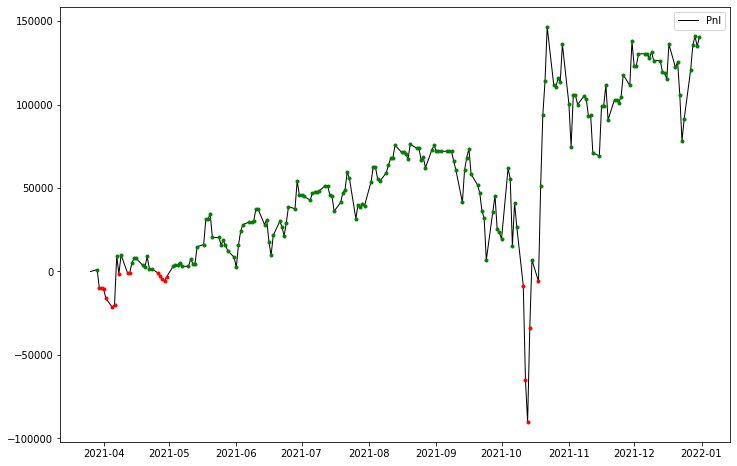

The final PnL is:  140430.331230164


In [ ]:
plt.plot(change_projected_actual_data.index, change_projected_actual_data.Position, color='k', lw=1., label='Position')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position == 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position == 0], color='k', lw=0, marker='.', label='flat')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position > 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position > 0], color='r', lw=0, marker='+', label='long')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Position < 0].index, change_projected_actual_data.Position[change_projected_actual_data.Position < 0], color='g', lw=0, marker='_', label='short')
plt.axhline(y=0, lw=0.5, color='k')
for i in range(NUM_SHARES_PER_TRADE, NUM_SHARES_PER_TRADE * 5, NUM_SHARES_PER_TRADE):
    plt.axhline(y=i, lw=0.5, color='r')
for i in range(-NUM_SHARES_PER_TRADE, -NUM_SHARES_PER_TRADE * 5, -NUM_SHARES_PER_TRADE):
    plt.axhline(y=i, lw=0.5, color='g')
plt.legend()
plt.show()
plt.plot(change_projected_actual_data.index, change_projected_actual_data.Pnl, color='k', lw=1., label='Pnl')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Pnl > 0].index, change_projected_actual_data.Pnl[change_projected_actual_data.Pnl > 0], color='g', lw=0, marker='.')
plt.plot(change_projected_actual_data.loc[change_projected_actual_data.Pnl < 0].index, change_projected_actual_data.Pnl[change_projected_actual_data.Pnl < 0], color='r', lw=0, marker='.')
plt.legend()
plt.show()

print('The final PnL is: ', change_projected_actual_data.Pnl[-1] )
change_projected_actual_data.to_csv("statistical_arbitrage.csv", sep=",")